# Final Project Overview and Instructions
## Introduction
In this final project, available to Verified learners only, we'll attempt to predict the type of physical activity (e.g., walking, climbing stairs) from tri-axial smartphone accelerometer data. Smartphone accelerometers are very precise, and different physical activities give rise to different patterns of acceleration.

(Note on project availability: while project submission is only available to Verified learners, all learners are welcome to work on the project on their own and have access to the instructions describing the project.)

## Input Data
The input data used for training in this project consists of two files. The first file, train_time_series.csv, contains the raw accelerometer data, which has been collected using the Beiwe research platform, and it has the following format:

timestamp, UTC time, accuracy, x, y, z

You can use the timestamp column as your time variable; you'll also need the last three columns, here labeled x, y, and z, which correspond to measurements of linear acceleration along each of the three orthogonal axes.

The second file, train_labels.csv, contains the activity labels, and you'll be using these labels to train your model. Different activities have been numbered with integers. We use the following encoding: 1 = standing, 2 = walking, 3 = stairs down, 4 = stairs up. Because the accelerometers are sampled at high frequency, the labels in train_labels.csv are only provided for every 10th observation in train_time_series.csv.

## Activity Classification
Your goal is to classify different physical activities as accurately as possible. To test your code, you're also provided a file called test_time_series.csv, and at the end of the project you're asked to provide the activity labels predicted by your code for this test data set. Only the course staff have the corresponding true labels for the test data, and the accuracy of your code will be determined as the percentage of correct classifications. Note that in both cases, for training and testing, the input file consists of a single (3-dimensional) time series. To test the accuracy of your code, you'll be asked to upload your predictions as a CSV file. This file called test_labels.csv is provided to you, but it only contains the time stamps needed for prediction; you'll need to augment this file by adding the corresponding class predictions (1,2,3,4).

## Code Run Time
In addition to providing the predictions, you're also asked to time the running time of your code, starting at the moment when you load in the test data set and ending at the moment you're done computing your predictions. You'll be asked to enter this running time, and the goal is to see how fast your code runs compared to the code of others. Because computing speeds vary for several reasons, including hardware and implementation of the code, these numbers aren't directly comparable, and for this reason your grading will not be affected by them. However, it may still be interesting to you to see how long the code of other participants takes to solve the problem.

## Project Submission
You're expected to implement your solution using a Jupyter notebook. Once you're done, you're asked to upload the notebook, which will be peer reviewed by other course participants. This review will impact your final course grade, so you should write your code as clearly code as possible, include comments, and use meaningful variable names.

You can approach this problem any way you'd like. It may be beneficial to search the web for possible solutions, or you may try to solve this problem from scratch. We recommend that you build your code in stages, encapsulating different parts (tasks) of the problem into functions. There are many ways to solve this problem. Good luck!

## Files for Download
You will need to download these four files to complete your project:

- train_labels.csv
- train_time_series.csv
- test_labels.csv
- test_time_series.csv

In [71]:
import numpy as np
import pandas as pd

train_time_series = pd.read_csv("train_time_series.csv",header=0,index_col=0,parse_dates=[2],date_parser=lambda col: pd.to_datetime(col,format='%Y-%m-%dT%H:%M:%S.%f'))
test_time_series = pd.read_csv("train_time_series.csv",header=0,index_col=0,parse_dates=[2])

train_labels = pd.read_csv("train_labels.csv",header=0,index_col=0,parse_dates=[2])
test_labels = pd.read_csv("test_labels.csv",header=0,index_col=0,parse_dates=[2])

In [72]:
try:
    train_time_series.drop(columns=['accuracy'],inplace = True)
    test_time_series.drop(columns=['accuracy'],inplace = True)
except KeyError:
    print("Column was already deleted")
except Exception as e:
    print("An exception occurred: ",e)

In [74]:
train_labels

,timestamp,UTC time,label
20589,1565109931087,2019-08-06 16:45:31.087,1
20599,1565109932090,2019-08-06 16:45:32.090,1
20609,1565109933092,2019-08-06 16:45:33.092,1
20619,1565109934094,2019-08-06 16:45:34.094,1
20629,1565109935097,2019-08-06 16:45:35.097,1
...,...,...,...
24289,1565110302030,2019-08-06 16:51:42.030,4
24299,1565110303032,2019-08-06 16:51:43.032,4
24309,1565110304034,2019-08-06 16:51:44.034,4
24319,1565110305037,2019-08-06 16:51:45.037,4


# Balance of Activity Classes

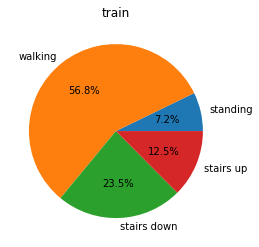

In [35]:
import matplotlib.pyplot as plt
def plot_activity(df,title="train"):
    counts = df.groupby('label').size()    
    classes={1 :'standing', 2 : 'walking', 3: 'stairs down', 4 : 'stairs up'}
    plt.pie(counts,autopct='%1.1f%%',labels=counts.index.map(classes));
    plt.title(title)
    plt.show()
    
plot_activity(train_labels)

# Plot all variables

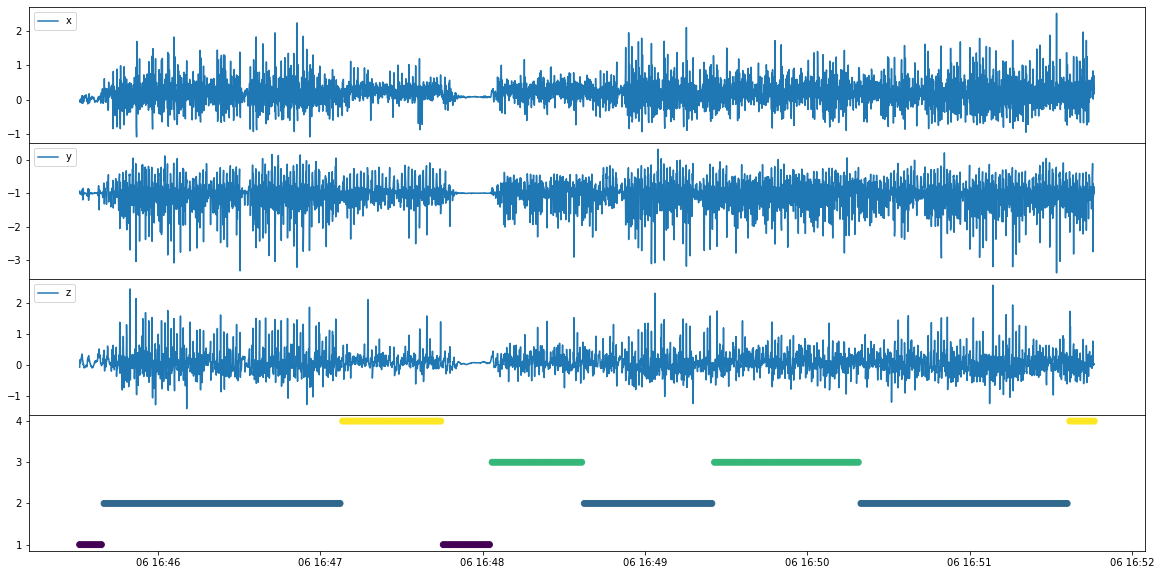

In [83]:
def plot_variable(X,y):
    labels=['x','y','z']
    plt.figure(figsize=(20,10))
    n,off =4,2
    ax,xaxis = None,None
    for i in range(3):
        ax = plt.subplot(n,1,i+1,sharex=xaxis)
        plt.setp(ax.get_xticklabels(),visible=False)
        plt.plot(X.iloc[:,1],X.iloc[:,i+off],label=labels[i])
        ax.legend(loc=2)
        if i == 0:
            xaxis = ax
    
    ax = plt.subplot(n,1,n)
    plt.scatter(y.iloc[:,1],y.iloc[:,2],c=y.iloc[:,2])
    plt.subplots_adjust(hspace=0)
    plt.show()
        
plot_variable(train_time_series,train_labels)